## Visualization of Simulation Results

### Results for chosen alpha and simulation no. 

In [3]:
from complex_contagions_package.visualizer import DiffusionPlotter

%matplotlib inline

plotter = DiffusionPlotter(dataset_path="../datasets/gelb_blau_final_ds_random_regular_graph_degree6.nc")

plotter.show_widgets()


Output()

In [ ]:
from complex_contagions_package.visualizer import DiffusionPlotter

%matplotlib inline

plotter = DiffusionPlotter(dataset_path="../datasets/gelb_gruen_final_ds_random_regular_graph_degree6.nc")

plotter.show_widgets()


Output()

In [4]:
from complex_contagions_package.visualizer import DiffusionPlotter

%matplotlib inline

plotter = DiffusionPlotter(dataset_path="../datasets/gelb_pink_final_ds_random_regular_graph_degree6.nc")

plotter.show_widgets()

Output()

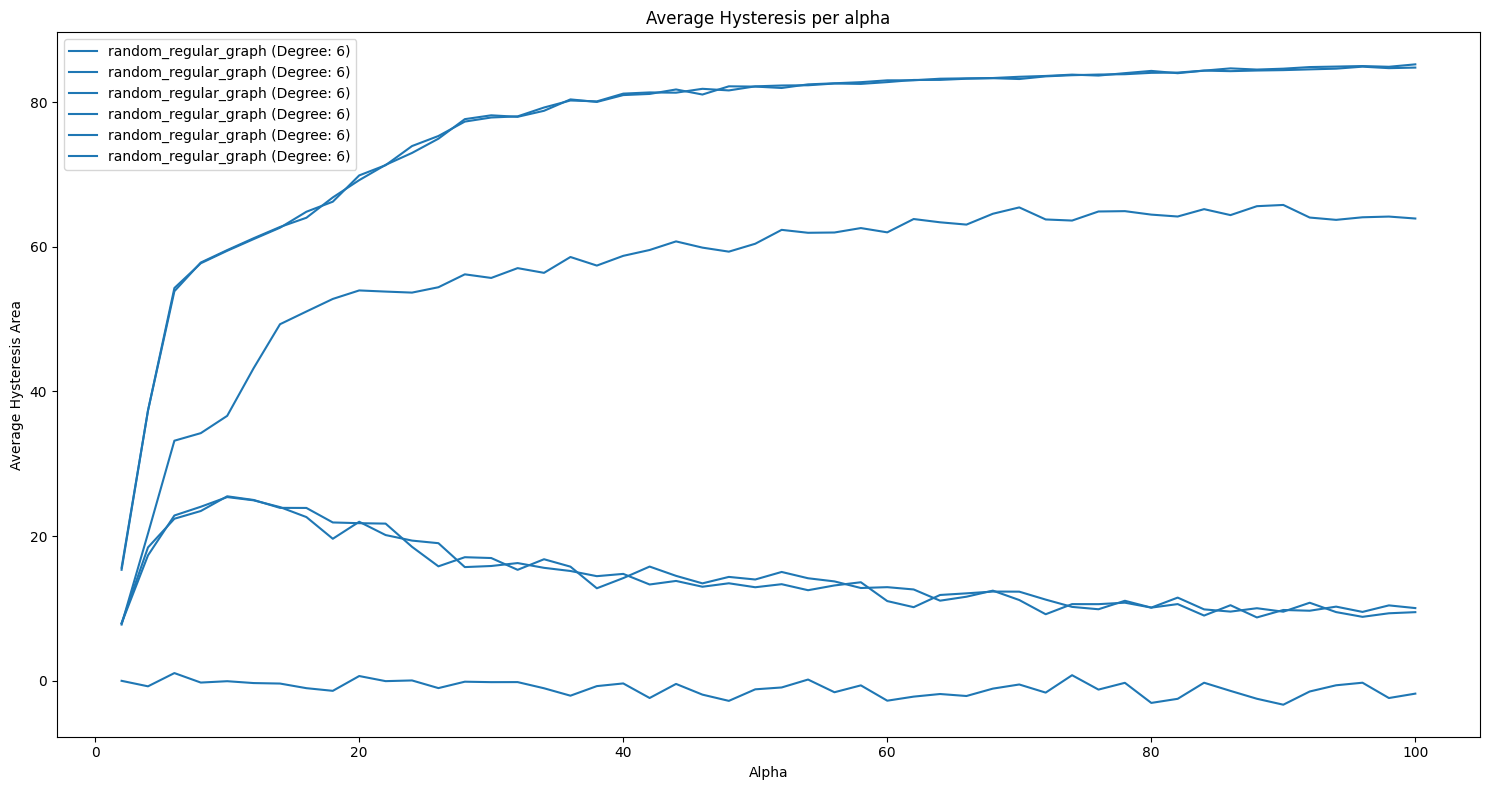

In [9]:
from complex_contagions_package.visualizer import DiffusionPlotter

%matplotlib inline
dataset_paths = [
    "../datasets/gelb_blau_final_ds_random_regular_graph_degree6.nc",
    "../datasets/gelb_gruen_final_ds_random_regular_graph_degree6.nc",
    "../datasets/gelb_pink_final_ds_random_regular_graph_degree6.nc",

    "../datasets/orange_blau_final_ds_random_regular_graph_degree6.nc",
    "../datasets/orange_gruen_final_ds_random_regular_graph_degree6.nc",
    "../datasets/orange_pink_final_ds_random_regular_graph_degree6.nc",
]

# Eine Dummy-Instanz erstellen, um die Methode `multiple_instances` zu nutzen
plotter = DiffusionPlotter(dataset_path=dataset_paths[0])
plotter.avg_hysteresis_per_alpha(dataset_paths)

/home/nemu/MasterThesis/complex_contagions_package/src/complex_contagions_package/visualizer.py:359: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hysteresis_df.groupby(['alpha', 'hysteresis_bin'])


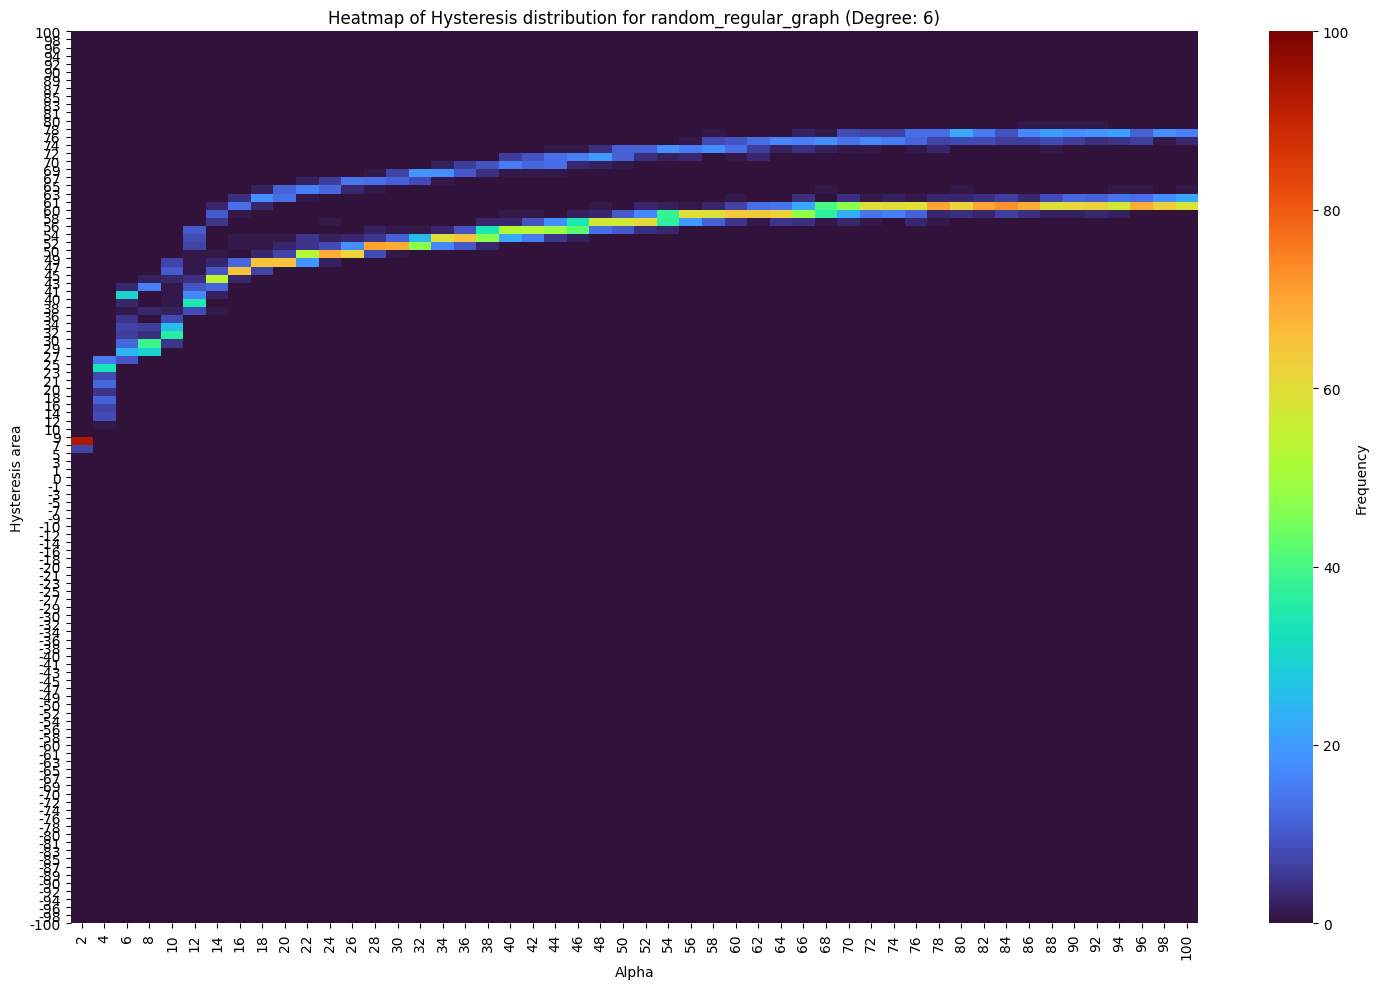

In [8]:
from complex_contagions_package.visualizer import DiffusionPlotter

%matplotlib inline
plotter = DiffusionPlotter(dataset_path="../datasets/critical_blau_final_ds_random_regular_graph_degree6.nc")

plotter.hysteresis_heatmap()

/home/nemu/MasterThesis/complex_contagions_package/src/complex_contagions_package/visualizer.py:359: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hysteresis_df.groupby(['alpha', 'hysteresis_bin'])


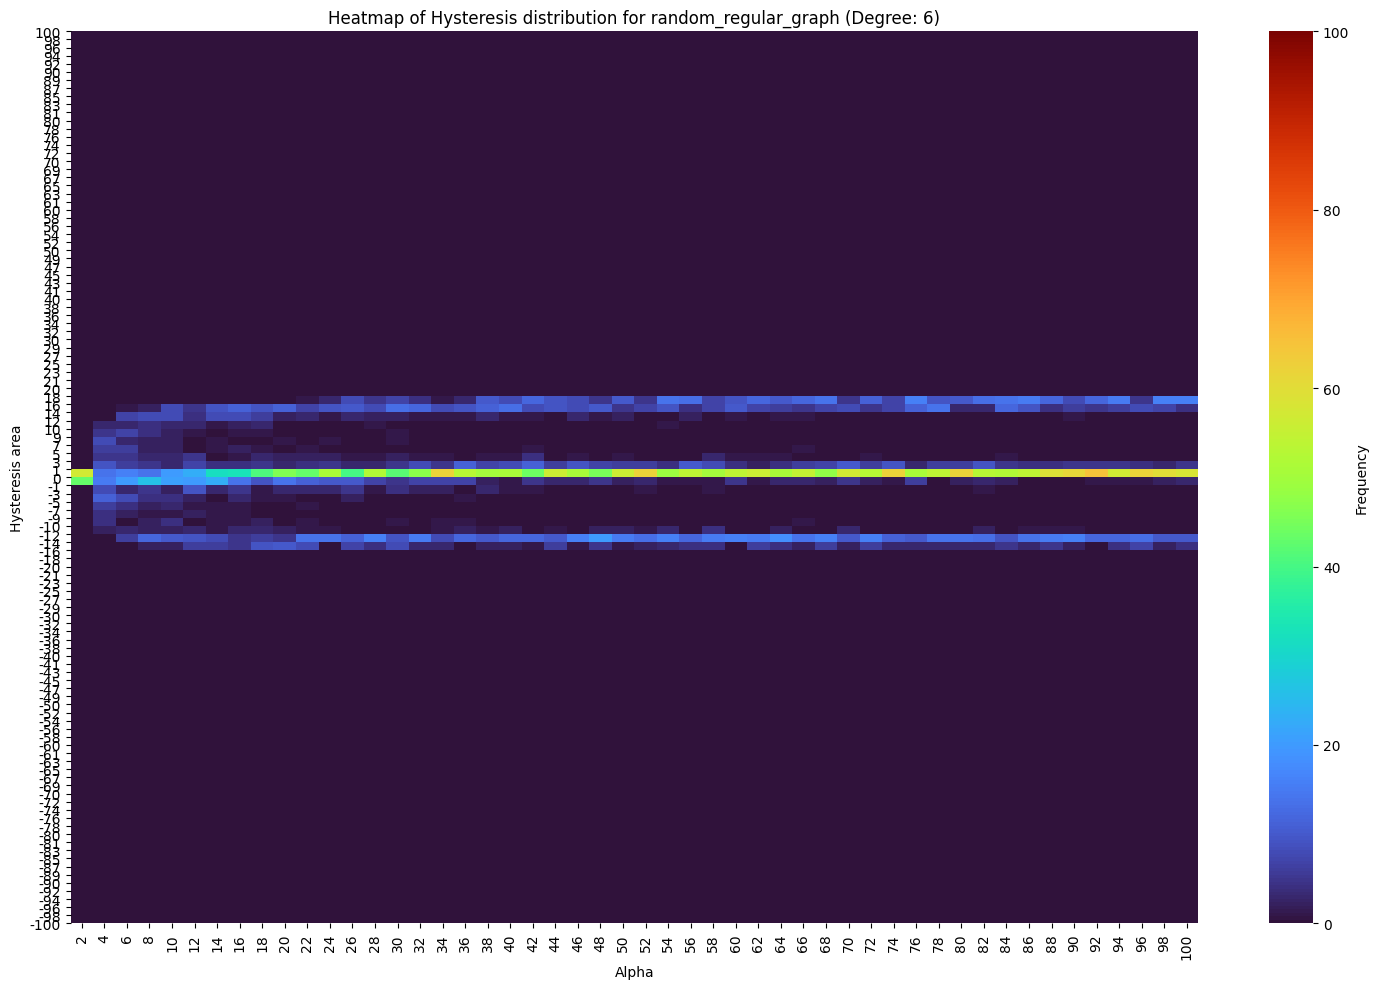

In [9]:
from complex_contagions_package.visualizer import DiffusionPlotter

%matplotlib inline
plotter = DiffusionPlotter(dataset_path="../datasets/cl_gelb_gruen_final_ds_random_regular_graph_degree6.nc")

plotter.hysteresis_heatmap()

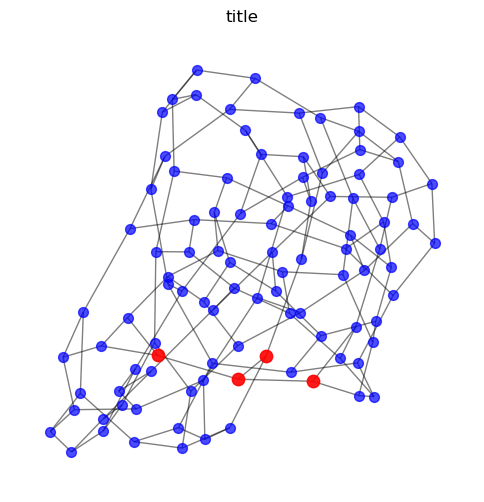

In [3]:
from complex_contagions_package.visualizer import visualize_graph
import networkx as nx

average_degree = 3
t0 = 10
#g_type = nx.connected_watts_strogatz_graph(100, average_degree, 0.5)
g_type = nx.random_regular_graph(average_degree, 100)

visualize_graph(t0, g_type, "title")

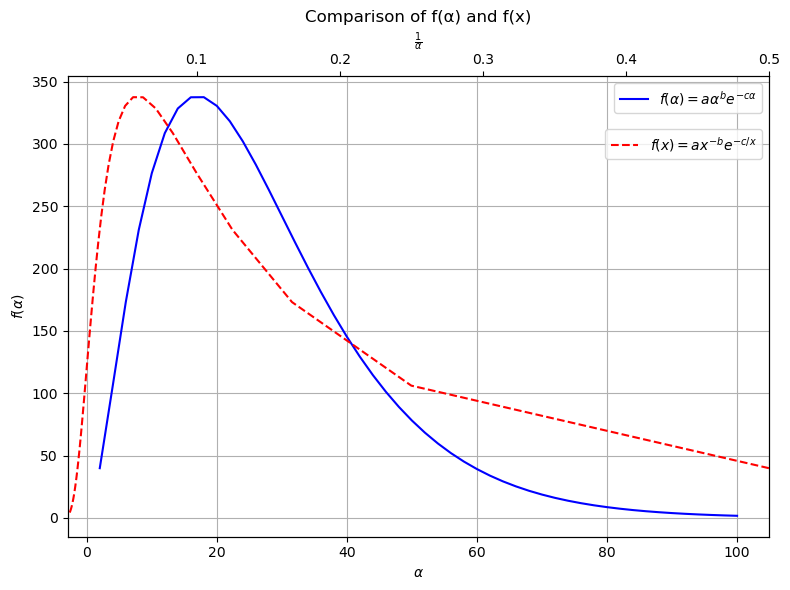

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
a = 15  # Scaling factor
b = 1.7  # Power-law exponent
c = 0.1  # Decay parameter

# Define alpha and x ranges
alpha = np.linspace(2, 100, 50)  # Avoid alpha=0 to prevent singularities

# Compute f(alpha) and f(x)
f_alpha = a * alpha**b * np.exp(-c * alpha)
f_x = (a * (1/alpha)**(-b) * np.exp(-c / (1/alpha)))

# Plot the functions
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot f(alpha)
ax1.plot(alpha, f_alpha, label=r'$f(\alpha) = a \alpha^b e^{-c\alpha}$', color='blue')
ax1.set_xlabel(r'$\alpha$')
ax1.set_ylabel(r'$f(\alpha)$')
ax1.grid()

# Create secondary x-axis for 1/alpha
ax2 = ax1.twiny()
ax2.set_xlim(1/alpha[-1], 1/alpha[0])  # Adjust x-limits to correspond to 1/alpha
ax2.set_xlabel(r'$\frac{1}{\alpha}$')

# Plot f(x) using ax2 as secondary plot
ax2.plot((1/alpha), f_x, label=r'$f(x) = a x^{-b} e^{-c/x}$', color='red', linestyle='dashed')

# Automatically place the legend within the plot
ax1.legend(loc='upper right', bbox_to_anchor=(1, 1), ncol=1)
ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.9), ncol=1)

plt.title("Comparison of f(α) and f(x)")
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()


In [1]:
import os
import xarray as xr

data_dir = "../data/"

alpha_files = []
alpha_files = sorted([f for f in os.listdir(data_dir)
                        if "final_simulation_alpha_" in f],
                    key=lambda x: int(x.split("_")[-1].split(".")[0]))


datasets = []

for idx, f in enumerate(alpha_files):
    ds = xr.open_dataset(os.path.join(data_dir, f))
    ds = ds.expand_dims("alpha")
    ds = ds.assign_coords(alpha=(["alpha"], [idx]))
    datasets.append(ds)

final_ds = xr.concat(datasets, dim="alpha")

final_ds.attrs = {
    "n_simulations": 100,
    "iterations": 50,
    "network_type": "random_regular_graph",
    "average_degree": 4
}

merged_filename = os.path.join("../datasets/", f"pipiss.nc")
final_ds.to_netcdf(merged_filename)

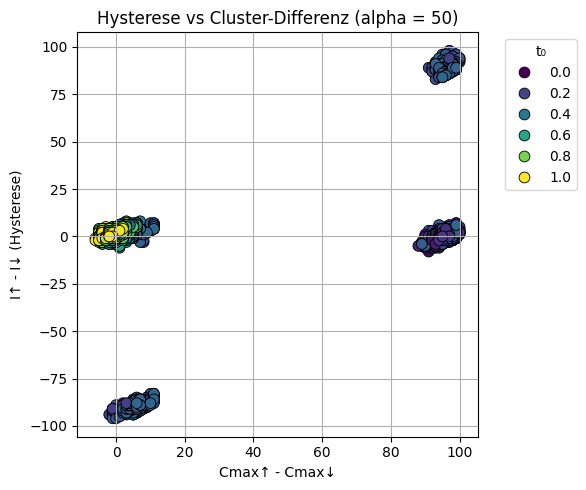

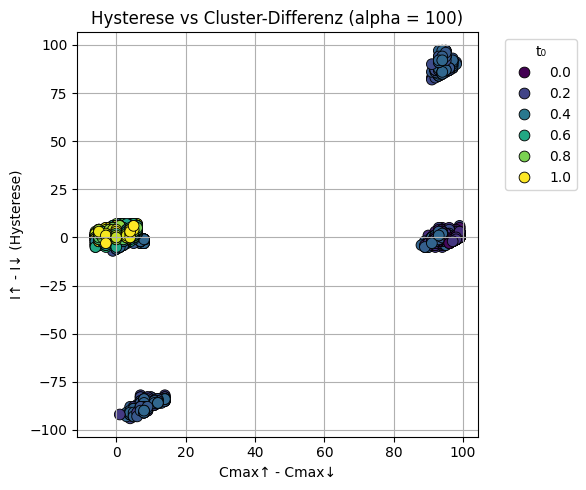

In [8]:
from complex_contagions_package.visualizer import DiffusionPlotter

plotter = DiffusionPlotter(dataset_path="../datasets/cl_gelb_gruen_final_ds_random_regular_graph_degree6.nc")
plotter.plot_hysteresis_vs_clusterdiff_per_alpha(selected_alphas=[50,100])